In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Phase 2: Webcam Integration - Learning Guide

## Setting Up Webcam in Jupyter

### Why Jupyter is Great for Webcam Development:
- **Incremental testing**: Test each function step by step
- **Immediate feedback**: See results right away
- **Easy debugging**: Isolate problems in individual cells
- **Visualization**: Display images inline

### Important Considerations:
1. **Camera Resource**: Only one application can use the camera at a time
2. **Memory Management**: Always release the camera when done
3. **Cell Re-execution**: Be careful not to create multiple camera instances

## Learning Tasks:

### Task 1: Basic Camera Connection
**Goal**: Learn how to connect to and release the webcam safely

**Concepts to understand**:
- `cv2.VideoCapture()` - Creates camera object
- `.read()` - Captures a frame
- `.release()` - Frees the camera resource
- Error handling for camera connection

### Task 2: Single Frame Capture
**Goal**: Capture and display one frame

**Concepts to understand**:
- Frame structure (height, width, channels)
- Color space (BGR vs RGB)
- Matplotlib display in Jupyter

### Task 3: Frame Processing
**Goal**: Apply basic image processing to captured frames

**Concepts to understand**:
- Image resizing
- Color conversion
- Basic filtering

### Task 4: Video Stream (Advanced)
**Goal**: Create a controlled video stream in Jupyter

**Concepts to understand**:
- Loop control
- Keyboard interrupts
- Display updating

## Task 1: Basic Camera Connection

### Your Challenge:
Write code to:
1. Connect to your webcam
2. Check if the connection is successful
3. Safely release the camera

### Hints:
- Use `cv2.VideoCapture(0)` where 0 is usually the default camera
- Check connection with `.isOpened()`
- Always call `.release()` when done
- Consider using a try-finally block for safety

### Expected Output:
- Success message if camera connects
- Error message if camera fails to connect
- Camera properly released in both cases

In [3]:
# Task 1: Basic Camera Connection
# Your code here - try to implement the camera connection logic
camera = cv2.VideoCapture(0)
if camera.isOpened():
    print("It's open!")
else:
    print("Not open.")

camera.release()
if camera.isOpened():
    print("Did not release properly.")
else:
    print("Released!")

It's open!
Released!


## Task 2: Single Frame Capture & Display

### Your Challenge:
After successfully connecting to the camera:
1. Capture one frame from the webcam
2. Convert BGR to RGB (OpenCV uses BGR, matplotlib uses RGB)
3. Display the frame using matplotlib
4. Print frame information (shape, data type)

### Hints:
- Use `.read()` to capture a frame - it returns (success, frame)
- Convert colors with `cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)`
- Display with `plt.imshow()` and `plt.show()`
- Check frame shape with `.shape`

### Additional Libraries Needed:
```python
import matplotlib.pyplot as plt
import numpy as np
```

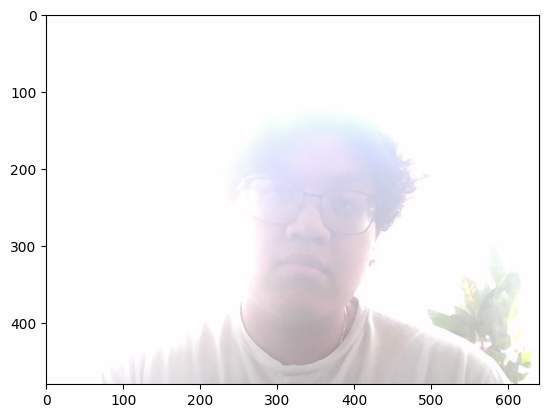

(480, 640, 3)


In [4]:
# Task 2: Single Frame Capture & Display
# Don't forget to import matplotlib.pyplot as plt and numpy as np
# Your code here - try to capture and display one frame

camera = cv2.VideoCapture(0)
success, frame = camera.read()
if not success:
    camera.release()
if not camera.isOpened():
    print("Camera failed to open")
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.show()
print(frame.shape)

camera.release()

## Task 3: Basic Image Processing

### Your Challenge:
Apply basic image processing techniques to captured frames:
1. Resize an image to different dimensions
2. Convert to different color spaces (grayscale, HSV)
3. Apply basic filters (blur, edge detection)
4. Save processed images

### Hints:
- Use `cv2.resize()` to change image dimensions
- Convert to grayscale with `cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)`
- Convert to HSV with `cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)`
- Apply blur with `cv2.GaussianBlur(image, (15, 15), 0)`
- Edge detection with `cv2.Canny(gray_image, 50, 150)`
- Save images with `cv2.imwrite('filename.jpg', image)`

### Expected Output:
- Display original, resized, grayscale, HSV, blurred, and edge-detected versions
- Save processed images to disk
- Print dimensions and properties of each processed image

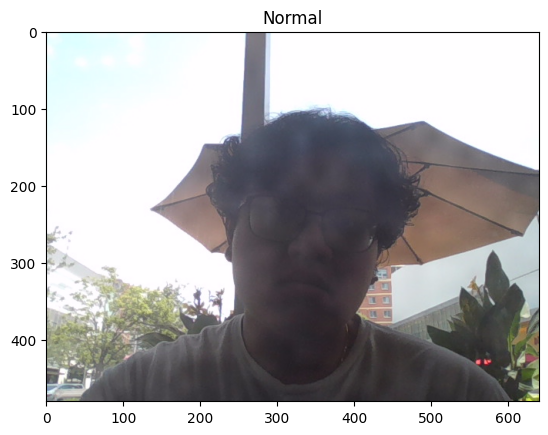

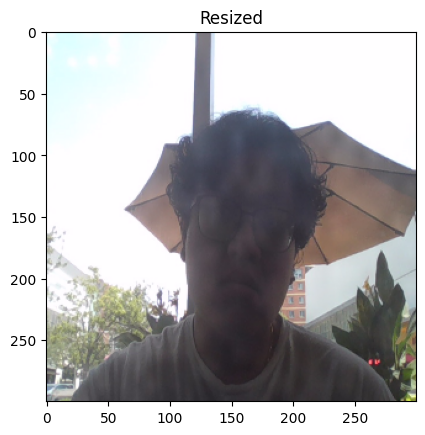

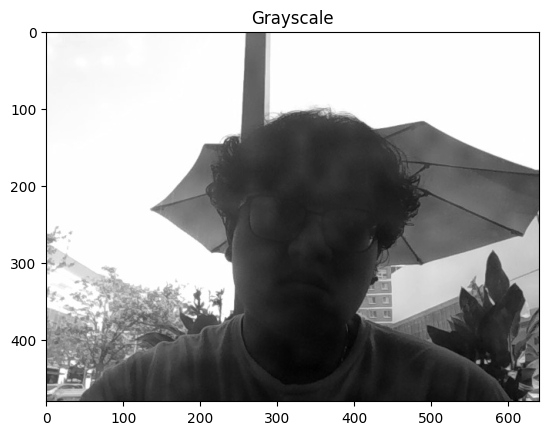

Hue: [[ 93  92  92 ... 150 150 150]
 [ 93  93  93 ... 150 150 150]
 [ 93  93  93 ... 150 150 150]
 ...
 [ 90  91  94 ...  32  32  31]
 [ 99 101 103 ...  33  32  32]
 [106 106 109 ...  33  33  33]] 
Saturation:  [[ 12  13  13 ...   1   1   1]
 [ 12  12  12 ...   1   1   1]
 [ 12  12  12 ...   1   1   1]
 ...
 [ 41  36  30 ... 166 164 160]
 [ 42  35  28 ... 154 153 143]
 [ 40  36  28 ... 149 146 135]] 
Value:  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [143 149 144 ... 137 132 134]
 [141 146 144 ... 142 135 136]
 [145 150 147 ... 144 133 132]]


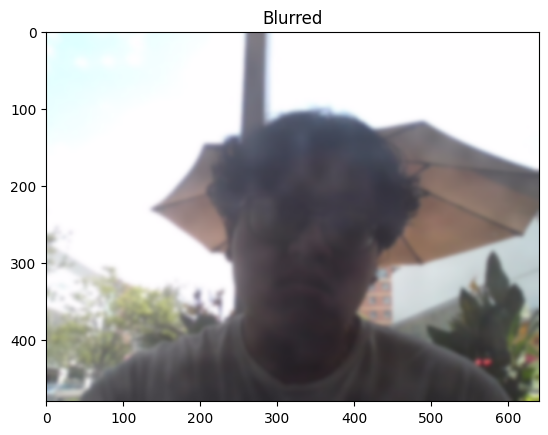

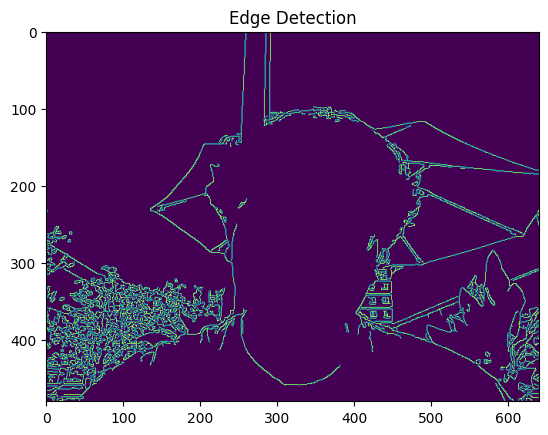

In [5]:
# Task 3: Basic Image Processing
# Your code here - try to implement image processing techniques
camera = cv2.VideoCapture(0)
try:
    success, cvframe = camera.read()

    frame = cv2.cvtColor(cvframe, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.title("Normal")
    plt.show()

    resized_frame = cv2.resize(frame, (300, 300))
    plt.imshow(resized_frame)
    plt.title("Resized")
    plt.show()

    gray_frame = cv2.cvtColor(cvframe, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_frame, cmap='gray')
    plt.title("Grayscale")
    plt.show()

    hsv_frame = cv2.cvtColor(cvframe, cv2.COLOR_BGR2HSV)
    hue = hsv_frame[:,:,0]
    saturation = hsv_frame[:,:,1]
    value = hsv_frame[:,:,2]
    print("Hue:", hue, "\nSaturation: ", saturation, "\nValue: ", value)

    blurred = cv2.GaussianBlur(frame, (15, 15), 0)
    plt.imshow(blurred)
    plt.title("Blurred")
    plt.show()

    edge = cv2.Canny(gray_frame, 50, 150)
    plt.imshow(edge)
    plt.title("Edge Detection")
    plt.show()
finally:
    camera.release()

## Task 4: Video Stream (Advanced)

### Your Challenge:
Capture and display a live video stream from your webcam in the notebook:
1. Continuously capture frames in a loop
2. Display each frame in real time
3. Allow the stream to be stopped with a keyboard interrupt
4. Optionally, apply real-time processing (e.g., grayscale, edge detection)

### Hints:
- Use a `while True` loop to keep capturing frames
- Use `try/except KeyboardInterrupt` to allow stopping
- Use `cv2.waitKey(1)` in scripts, but in Jupyter, just break the loop with an interrupt
- Display frames with matplotlib (may need to clear output each time)
- Release the camera after the loop

### Expected Output:
- Live video stream displayed in the notebook
- Optionally, show processed frames (grayscale, edges)
- Camera released when stream ends

In [7]:
from IPython.display import clear_output

camera = cv2.VideoCapture(0)
try:
    while True:
        success, frame = camera.read()
        if not success:
            break
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        plt.imshow(rgb)
        plt.show()

except KeyboardInterrupt:
    print("Feed Interrupted")
finally:
    camera.release()

Feed Interrupted
